# Multiple Linear Regression

**Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.**

**Formula and Calculation of Multiple Linear Regression:**

**yi=ß0+ ß1 xi1+ ß2 xi2 +........+ ßp xip+ ϵ**

yi =dependent variable

xi=explanatory variables

ß0=y-intercept (constant term)

ßp=slope coefficients for each explanatory variable

ϵ=the model’s error term (also known as the residuals)


**Example:**

Prediction of CO2 emission based on engine size and number of cylinders in a car.

**Assumptions for Multiple Linear Regression:**

1.A linear relationship should exist between the Target and predictor variables.
2.The regression residuals must be normally distributed.
3.MLR assumes little or no multicollinearity (correlation between the independent variable) in data.

**The coefficient of determination (R-squared) is a statistical metric that is used to measure how much of the variation in outcome can be explained by the variation in the independent variables**

# Implementation of Multiple Linear Regression model 

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
df.shape

(50, 5)

In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [11]:
df["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

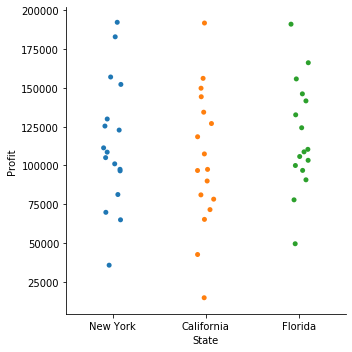

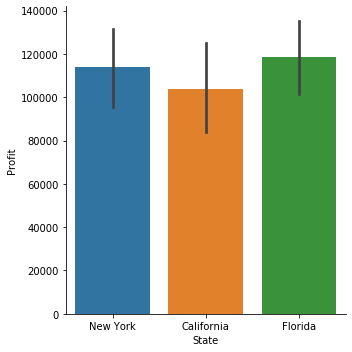

In [12]:
sns.catplot(data=df, x="State",y="Profit")
sns.catplot(data=df, x="State", y="Profit",kind="bar")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


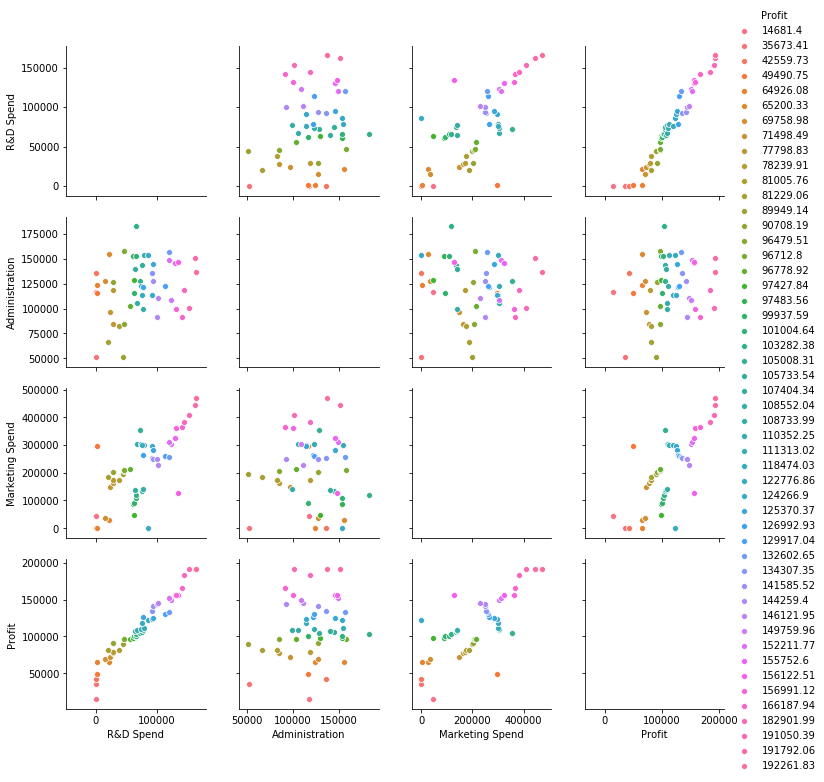

In [13]:
sns.pairplot(df,hue="Profit")

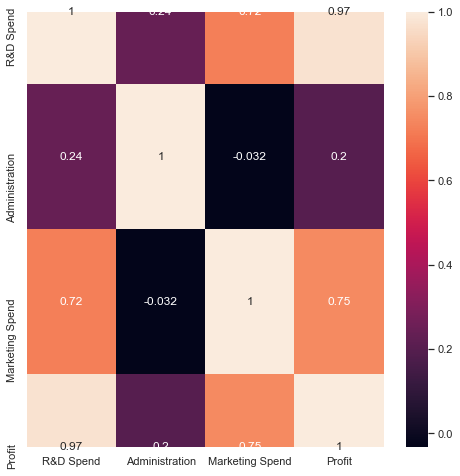

In [14]:
sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(df.corr(),annot=True)

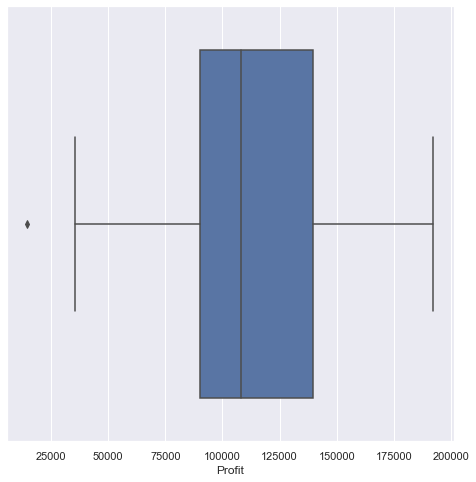

In [15]:
sns.boxplot(df['Profit'])

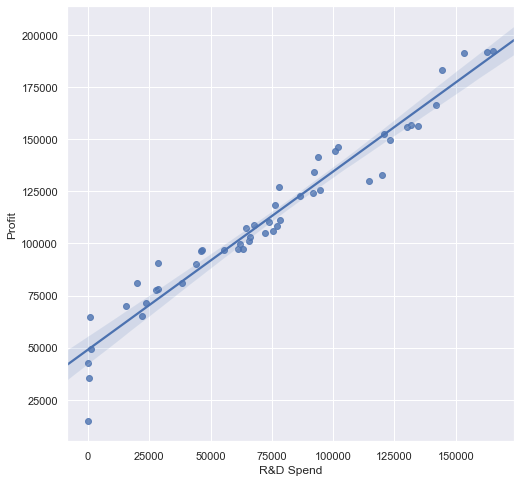

In [16]:
sns.regplot(x='R&D Spend',y="Profit",data=df)

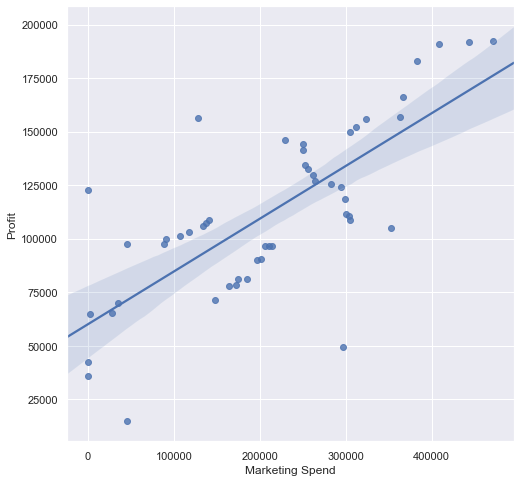

In [17]:
sns.regplot(x='Marketing Spend',y="Profit",data=df)

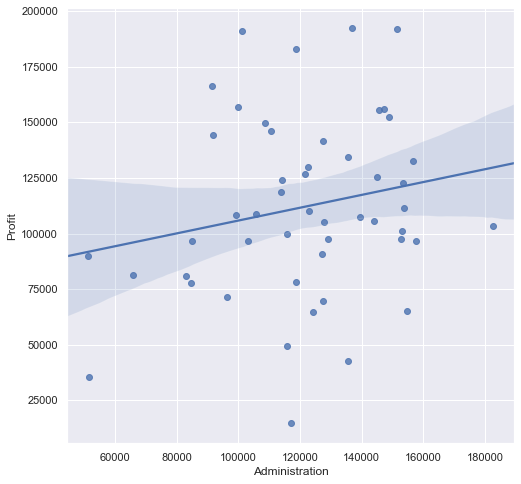

In [18]:
sns.regplot(x='Administration',y="Profit",data=df)

In [19]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
# replacing values
df['State'].replace(["New York","California" ,"Florida"],[0, 1,2], inplace=True)

In [22]:
#Extracting dependent and independent Variables:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [23]:
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 2.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 2.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 2.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 2.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 1.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 2.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 1.0000000e+00],
       [1.1994324e+05, 1.5654742e+

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=1/3,random_state=10)

In [26]:
X_test.shape

(33, 4)

In [27]:
y_test.shape

(33,)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Model Training

In [30]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [31]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(regressor.coef_)

[38676.37416057 -2833.29976762  3124.30734298  -256.42851577]


In [33]:
print(regressor.intercept_)

111339.34


In [34]:
#Predicting the Test set result;  
y_pred= regressor.predict(X_test)  

In [35]:
y_pred

array([114983.96137868, 130921.04977205,  95992.15417285, 191900.63168333,
       130155.69356591,  85746.79151122,  45296.34539735, 109480.25767627,
       169296.51638041, 128149.61624569, 115056.24972837, 115195.45408021,
       130589.3623129 , 149556.51954872, 178258.71483021,  75975.13611588,
        98970.21738035, 116596.86644742, 140091.88572041,  72704.54117924,
       117967.1499333 ,  52472.11723792,  53480.69890399,  45958.65213317,
       153106.59595568,  58247.79113167, 100278.43287435, 101326.71053463,
        97076.27559059, 196892.5420518 , 149389.93966459,  73147.42738853,
       159151.99716796])

In [49]:
#Comapre y_test and y_pred that is near about same
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df


,Predicted value,Actual Value
0,114983.961379,105008.31
1,130921.049772,124266.90
2,95992.154173,97483.56
3,191900.631683,191792.06
4,130155.693566,141585.52
5,85746.791511,96712.80
6,45296.345397,64926.08
7,109480.257676,105733.54
8,169296.516380,156991.12
9,128149.616246,134307.35


In [37]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.9904701013040932
Test Score:  0.9211632296076727


In [50]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_pred , y_test)
print( "Mean Absolute Error : " ,  MAE)

Mean Absolute Error :  8827.580145817408


In [ ]:
** Therefore our predicted value can be 8827.577323580025 units more or less than the actual value.**

In [47]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test , y_pred )
print( "Mean Squerd Error : " ,  MSE*100)

Mean Squerd Error :  12281375450.776068


In [48]:
RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
print( "Root Mean Squerd Error : " ,  RMSE*100)

Root Mean Squerd Error :  1108213.673024118


Text(0, 0.5, 'Test Predicted Data')

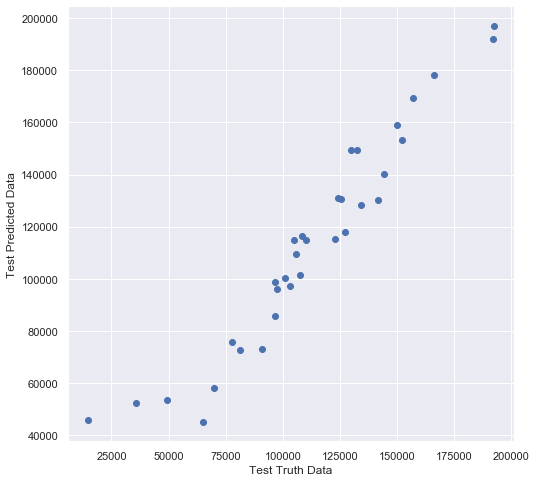

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [39]:
## residuals
residuals=y_test-y_pred
residuals

array([ -9975.65137868,  -6654.14977205,   1491.40582715,   -108.57168333,
        11429.82643409,  10966.00848878,  19629.73460265,  -3746.71767627,
       -12305.39638041,   6157.73375431,  -4703.99972837,   7581.40591979,
        -5218.9923129 , -16953.86954872, -12070.77483021,   1823.69388412,
        -2191.29738035,  -8044.82644742,   4167.51427959,   8524.51882076,
         9025.7800667 , -16798.70723792,  -3989.94890399, -31277.25213317,
         -894.82595568,  11511.18886833,    726.20712565,   6077.62946537,
         6206.10440941,  -4630.7120518 , -19472.89966459,  17560.76261147,
        -9392.03716796])

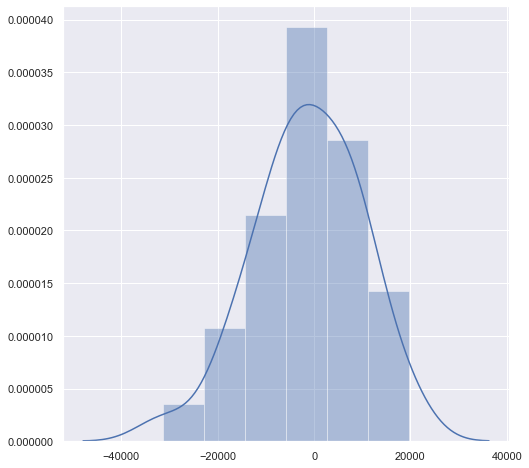

In [40]:
sns.distplot(residuals)

In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9211632296076727


In [42]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9099008338373402

**Summary** 

R-square:0.9211632296076727
From this R-square value we can say that the model is performing good